#신경망 모델 훈련
딥러닝 개발의 중점  : 모델의 구조 제작


1. 손실 곡선
- 케라스의 fit()은 history 객체 자동 반환
- history = 손실과 정확도 저장

#이번장 : 에포크에 따른 검증손실, 드롭아웃, 콜백

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split #분할 모델
(train_input,train_target),(test_input,test_target) =\ #mnist 데이터 셋load
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input/255.0  #데이터 정규화
train_scaled, val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size =0.2, random_state = 42) #80/20 나눔

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer = None): #신경말 모델을 만드는 함수
  model = keras.Sequential() #신경망 모델 제작
  model.add(keras.layers.Flatten(input_shape = (28,28))) #자동으로 데이터를 (784,0)으로 변환
  model.add(keras.layers.Dense(100,activation = 'relu')) #은닉1 : 100개의 뉴런, 활성화 함수 : 렐루
  if a_layer: #만약 매개변수가 들어오면 은닉층 추가
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax')) #출력층: 10개의 뉴런, 활성화 함수 softmax
  return model

In [ ]:
model = model_fn() #특성 784 *100 +100, 100*10 + 10
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') #레이블 -> 정수, 정확도가 측정하고 싶음
history = model.fit(train_scaled,train_target,epochs = 5,verbose = 0) #반복횟수 = 5, verbose = 훈련과정 출력 매개변수

In [ ]:
history2 = model.fit(train_scaled,train_target,epochs = 5,verbose = 1) #1로 하면 이런 진행 막대가 지표와 출력, 손실률, 정확도

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3066 - accuracy: 0.8909
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3000 - accuracy: 0.8933
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2904 - accuracy: 0.8986
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.9018
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.9031


In [ ]:
print(history.history.keys()) #5번의 훈련에 대한 손실과 정확도가 리스트로 저장되 있음

dict_keys(['loss', 'accuracy'])


In [ ]:
print(history.history)

{'loss': [0.5376781225204468, 0.39380964636802673, 0.3555827736854553, 0.3368602395057678, 0.31973686814308167], 'accuracy': [0.8114166855812073, 0.8567916750907898, 0.8722500205039978, 0.8793749809265137, 0.8867499828338623]}


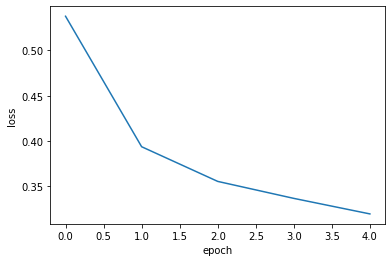

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

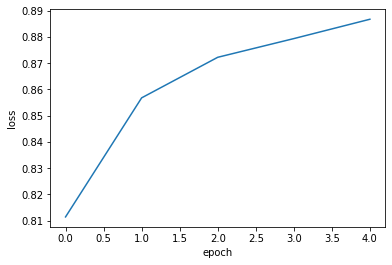

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

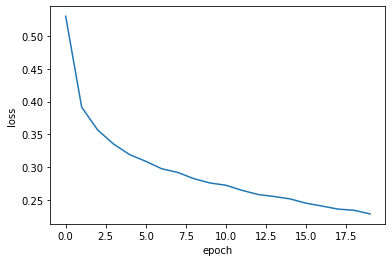

In [ ]:
model = model_fn() 
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') #에포크 증가 시켜봄
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
#에포크 증가시 손실이 더 빠르게 줄어듬

#검증 손실
손실을 이용해 과대/과소 적합 판단
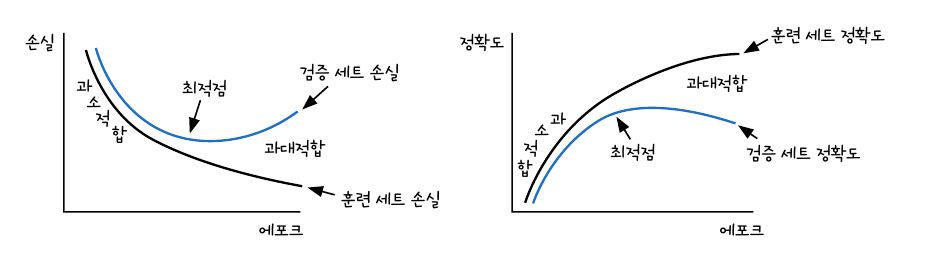

In [ ]:
model = model_fn() 
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


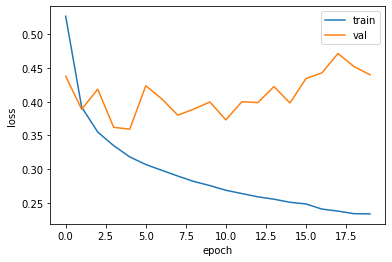

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()  #5번째 에포크가 최적의 에포크


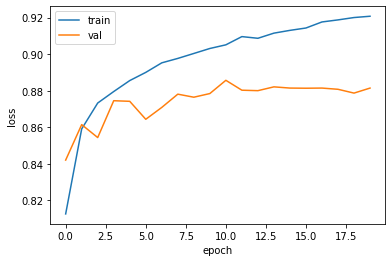

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

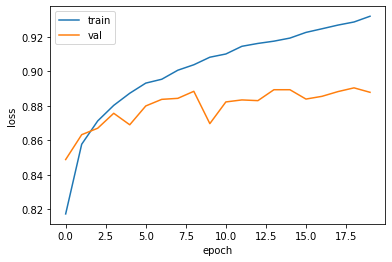

In [ ]:
model = model_fn() 
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

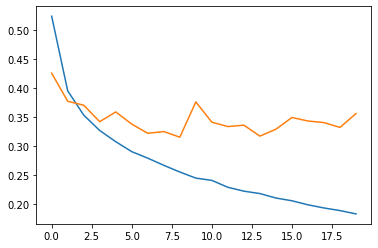

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

#다양한 옵티마이저들 정리
adam이 가장 많이 쓰인다고 함


*   rmsprop : -adagrad의 단점 보안
              -adagrad는 파라미터와 기울기가 반비례
              -파라미터 별로 학습률이 달라짐
              -허나 파라미터의 값이 너무 커지면 기울기가 소멸하는 걸 방지하기위해
              -변화량 억제 비율 유지 기능 추가한게 rmsprop


*   모멘텀 :  -운동량 개념 도입해서 가속도를 이용한 학습
              -지역 최소점 탈출이 쉬워지는 장점


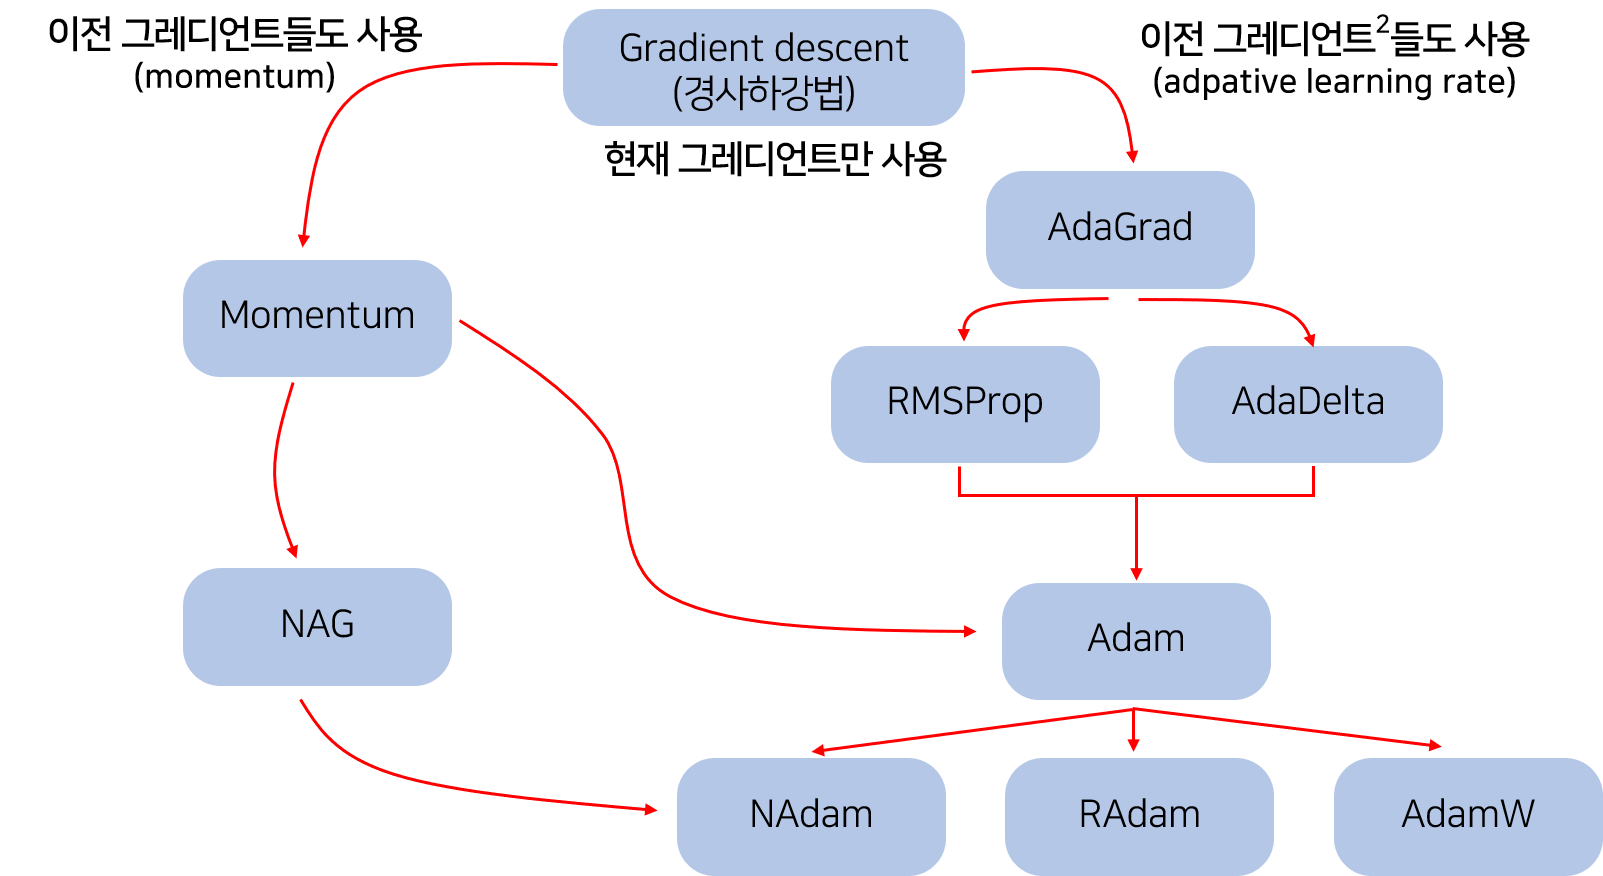

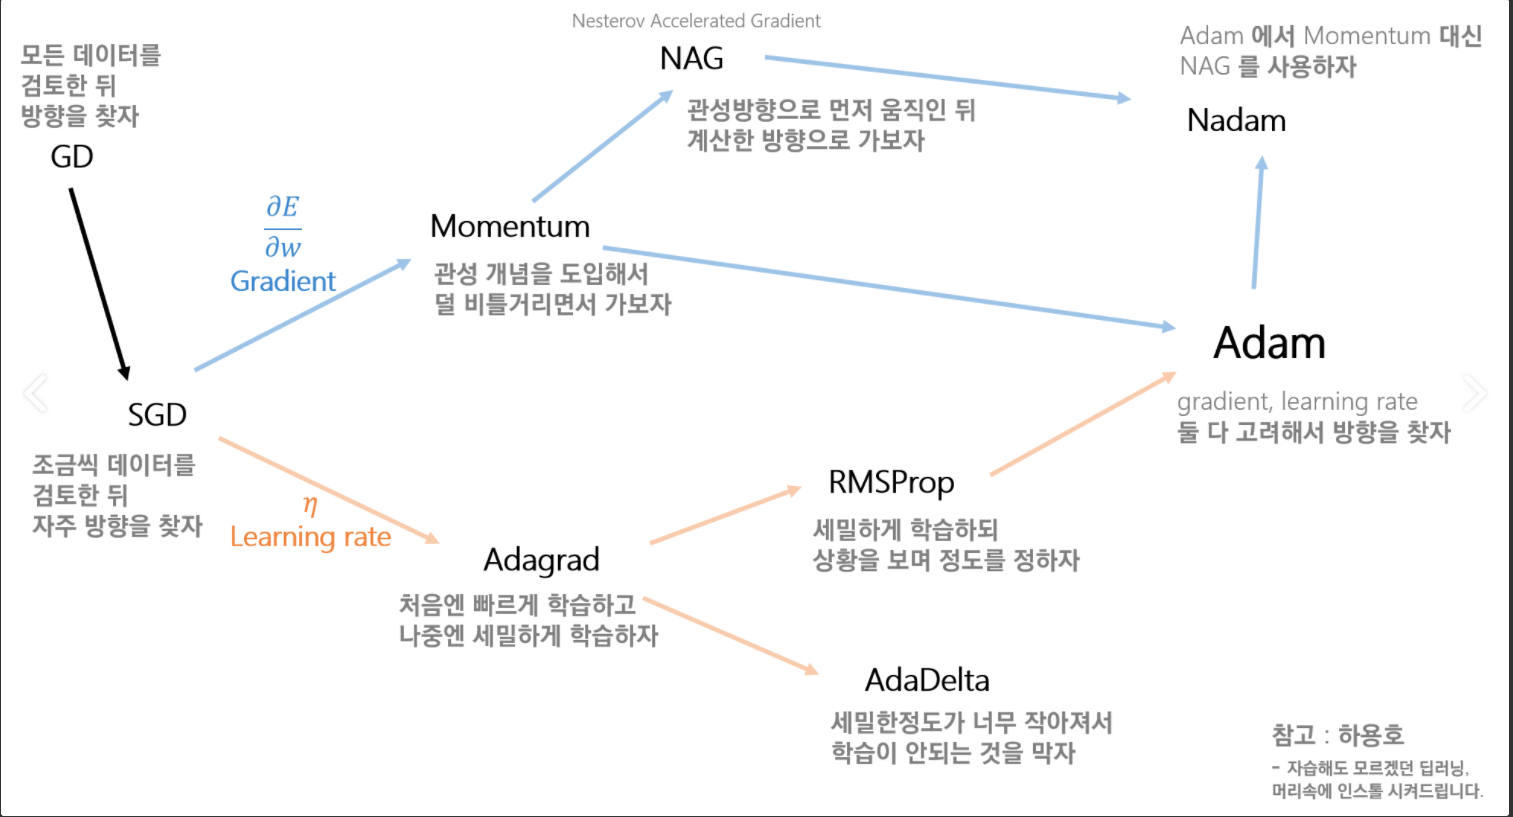

# 드롭아웃
-과대 적합 방지를 위해 각 층에서 일부 뉴런의 출력을 0으로 만듬


① 입력층과 은닉층의 임의 노드 선택 및 제거


② 임의 노드 제거 상태에서 학습 수행


③ 실제 테스트 시 제거 노드 복원 및 가중치 연산


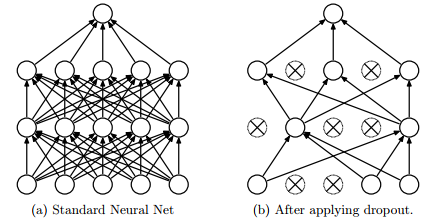

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


드롭아웃층 => 걸러지는 필터같은 느낌

dense12층에서 나온 출력의 30%를 랜덤으로 꺼버림

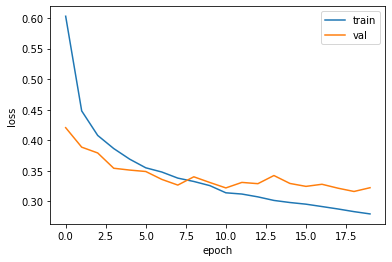

In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

#모델 저장 및 로드

1. save_weights = 훈련한 모델의 파라미터를 저장
2. load_weights = 저장한 파라미터 로드, 단, 저장된 모델의 구조가 로드할 모델의 구조와 같아야함.
3. save = 모델 구조, 파라미터 둘 다 저장

#HDF5 파일
- 모델의 구조, 파라미터, complie() 정보를 담고있는 파일
- 안정적이고, 검색이 빠르며, 많은량의 데이터 저장 가능, 병렬적 입출력 가능

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
history = model.fit(train_scaled,train_target,epochs = 10,verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')
model.save('model.h5')

In [ ]:
!ls -al *.h5 #현재 디렉토리 내(ls) 가지고 있는 모든 파일(a)의 자세한 정보(l)를 출력. 단 형식자가 h5인 모든 파일

-rw-r--r-- 1 root root 981776 May 10 16:26 model.h5
-rw-r--r-- 1 root root 332480 May 10 16:26 model-weights.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

#10가지 레이블에 대한 예측 확률 확인
검증 세트 사용 (검증 데이터 수 -> 12000개)

레이블은 총 10개 이므로 (12000,10)의 크기를 출력

In [ ]:
import numpy as np 
val_labels = np.argmax(model.predict(val_scaled),axis = 1)#-1이 끝값이기에 1이 마지막이라 1이나 -1이나 상관x
print(np.mean(val_labels == val_target))

0.8790833333333333


한 데이터(각 열)에 대한 예측 확률중 가장 높은 확률의 인덱스를 label에 넣어
정답이면 1, 아니면 0으로 하여 평균값 계산 -> **정확도**

In [ ]:
model = keras.models.load_model('model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3271 - accuracy: 0.8791


[0.3270987868309021, 0.8790833353996277]

#콜백
- 훈련과정 중  작업 수행
1. Modelcheckpoint = 모델 학습 도중 가장 낮은 검증 점수의 모델 파라미터를 저장
2. earlystopping = 지정한 횟수만큼 검증점수가 향상되지 않으면 훈련 중지 및 가장 낮은 검증 손실을 낸 모델로 되돌림

둘 다 keras의 callbacks 패키지에 있음

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
history = model.fit(train_scaled,train_target,epochs = 10,verbose = 0,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3290 - accuracy: 0.8764


[0.3290249705314636, 0.8764166831970215]

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy') 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stop_cb = keras.callbacks.EarlyStopping(patience = 2,
                                              restore_best_weights = True)#2번동안 검증점수 향상 안되면 중단, 및 그 전 동안 가장 좋은 검증점수의 모델로 되돌림
history = model.fit(train_scaled,train_target,epochs = 20,verbose = 0,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stop_cb])

In [ ]:
print(early_stop_cb.stopped_epoch)

12


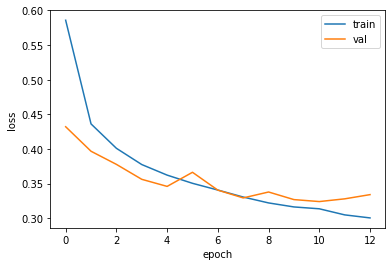

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show() #11번째 최적 -> 12,13이 향상 안되어서 중지 및 11번째 모델 파라미터로 되돌림

In [ ]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8808


[0.32420194149017334, 0.8808333277702332]